In [ ]:
#Install necessary Libraries
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install wordcloud
!pip install scikit-learn
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 40.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.2 MB/s eta 0:00:00


In [ ]:
#Import installed libraries import pandas as pd
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from  sklearn.feature_extraction.text import TfidfVectorizer
from  sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import pickle
import streamlit as st
import time

In [ ]:
from google.colab import files
uploaded=files.upload()

In [ ]:
# Load the dataset
df = pd.read_csv('twitter_validation.csv', header=None, index_col=[0])

# Select relevant columns and reset the index
df = df[[2, 3]].reset_index(drop=True)

# Assign column names
df.columns = ['sentiment', 'text']


In [ ]:
#Remove row with missing values
df.dropna(inplace = True)

#Remove rows with empty text
df = df[df['text'].apply(len) > 1]

#Lowercase the text
df['text'] = df['text'].apply(lambda x: x.lower())

#Remove URLs

df ['text'] = df['text'].apply(lambda x: re.sub(r'http\S+','', x))

#Remove HTML tags

df['text']= df['text'].apply(lambda x: re.sub(r'<.*?>', '', x))

#Remove special charactes and punctuations

df['text'] = df['text'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

#Remove retweet tags

df['text']=df['text'].apply(lambda x: re.sub(r'^RT[\s]+', '', x))

In [ ]:
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['sentiment'], test_size=0.2, random_state=42)
#Define stopwords
stopwords = ['where', 'during', 'itself', 'no', 'how', 'down', 'shall', 'in', 'or', 'he', 'been', 'about', 'each', "i", "weren't", 'does', 'all', 'more', 'theirs', "wasn't", "you'll", "wouldn't", "should've", "haven't", "aren't", "mightn't", "hasn't"]


In [ ]:
#Initialize pipeline with TD-IDF vectorizer and Random Forest Classifier
clf = Pipeline([('tfidf', TfidfVectorizer(stop_words= stopwords)),('rfc',RandomForestClassifier(n_estimators=100, n_jobs=-1))])

# Train the model
clf.fit(X_train, y_train)
# Evaluate the model
predictions = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))

# Save the model
pickle.dump(clf, open('twitter_validation.pkl', 'wb'))

c:\Users\asd\anaconda3\envs\testEnv\lib\site-packages\sklearn\feature_extraction\text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'hasn', 'haven', 'll', 'mightn', 'should', 've', 'wasn', 'weren', 'wouldn', 'you'] not in stop_words.
  % sorted(inconsistent)


Accuracy: 0.48


In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

# Initialize pipeline with TF-IDF vectorizer and SVM classifier
#Initialize pipeline with TF-IDF vectorizer and SVM classifier

clf_svm = Pipeline([
    ("tfidf", TfidfVectorizer(stop_words=stopwords, max_features=10000)), #Adjust max features
     ('svm', SVC(kernel='linear'))
  ])
#Train the model
clf_svm.fit(X_train, y_train)
#Evaluate the model

predictions_svm=clf_svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, predictions_svm))

c:\Users\asd\anaconda3\envs\testEnv\lib\site-packages\sklearn\feature_extraction\text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'hasn', 'haven', 'll', 'mightn', 'should', 've', 'wasn', 'weren', 'wouldn', 'you'] not in stop_words.
  % sorted(inconsistent)


SVM Accuracy: 0.49


In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize pipeline with TF-IDF vectorizer and Logistic Regression classifier

clf_lr=Pipeline([('tfidf', TfidfVectorizer(stop_words=stopwords)), ('lr', LogisticRegression())])

#Train the model

clf_lr.fit(X_train, y_train)

# Evaluate the model

predictions_lr = clf_lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, predictions_lr))

c:\Users\asd\anaconda3\envs\testEnv\lib\site-packages\sklearn\feature_extraction\text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'hasn', 'haven', 'll', 'mightn', 'should', 've', 'wasn', 'weren', 'wouldn', 'you'] not in stop_words.
  % sorted(inconsistent)


Logistic Regression Accuracy: 0.47


In [ ]:
from sklearn.naive_bayes import MultinomialNB
#Initialize pipeline with TF-IDF vectorizer and Mulitnomial Naive Bayes Classifier

clf_nb = Pipeline([('tfidf',TfidfVectorizer(stop_words = stopwords)),('nb',MultinomialNB())])

#Train the model
clf_nb.fit(X_train,y_train)

#Evaluate the model
predictions_nb = clf_nb.predict(X_test)
print("Naive Bayes Accuracy is: ", accuracy_score(y_test,predictions_nb))

Naive Bayes Accuracy is:  0.5


c:\Users\asd\anaconda3\envs\testEnv\lib\site-packages\sklearn\feature_extraction\text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'hasn', 'haven', 'll', 'mightn', 'should', 've', 'wasn', 'weren', 'wouldn', 'you'] not in stop_words.
  % sorted(inconsistent)


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

#Initialize pipeline with TF-IDF vectorizer and Gradient Boosting classifier

clf_gb = Pipeline([('tfidf', TfidfVectorizer(stop_words=stopwords)), ('gb', GradientBoostingClassifier())])

#Train the model

clf_gb.fit(X_train, y_train)

#Evaluate the model

predictions_gb=clf_gb.predict(X_test)

print("Gradient Boosting Accuracy:", accuracy_score(y_test, predictions_gb))

c:\Users\asd\anaconda3\envs\testEnv\lib\site-packages\sklearn\feature_extraction\text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'hasn', 'haven', 'll', 'mightn', 'should', 've', 'wasn', 'weren', 'wouldn', 'you'] not in stop_words.
  % sorted(inconsistent)


Gradient Boosting Accuracy: 0.46


In [ ]:
#plot 2x4 grid histogram for each numerical feature

plt.figure(figsize=(20, 10))

num_cols = df.select_dtypes(include='number').columns

for i, col in enumerate(num_cols):
    plt.subplot(2, 4, i+1)

    #Plot KDE for each sentiment category
    for sentiment_category in df['sentiment'].unique():
        sns.kdeplot(data=df[df['sentiment'] == sentiment_category][col], label = sentiment_category, fill=True)

    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()


<Figure size 2000x1000 with 0 Axes>

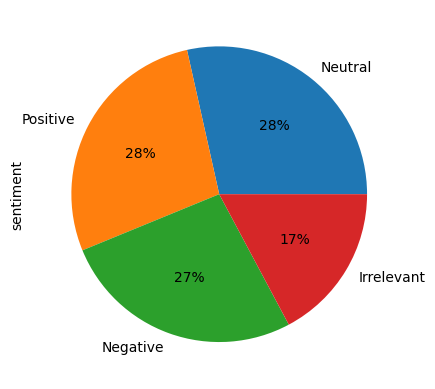

In [ ]:
df['sentiment'].value_counts().plot(kind='pie', autopct='%1.0f%%')

#word cloud
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

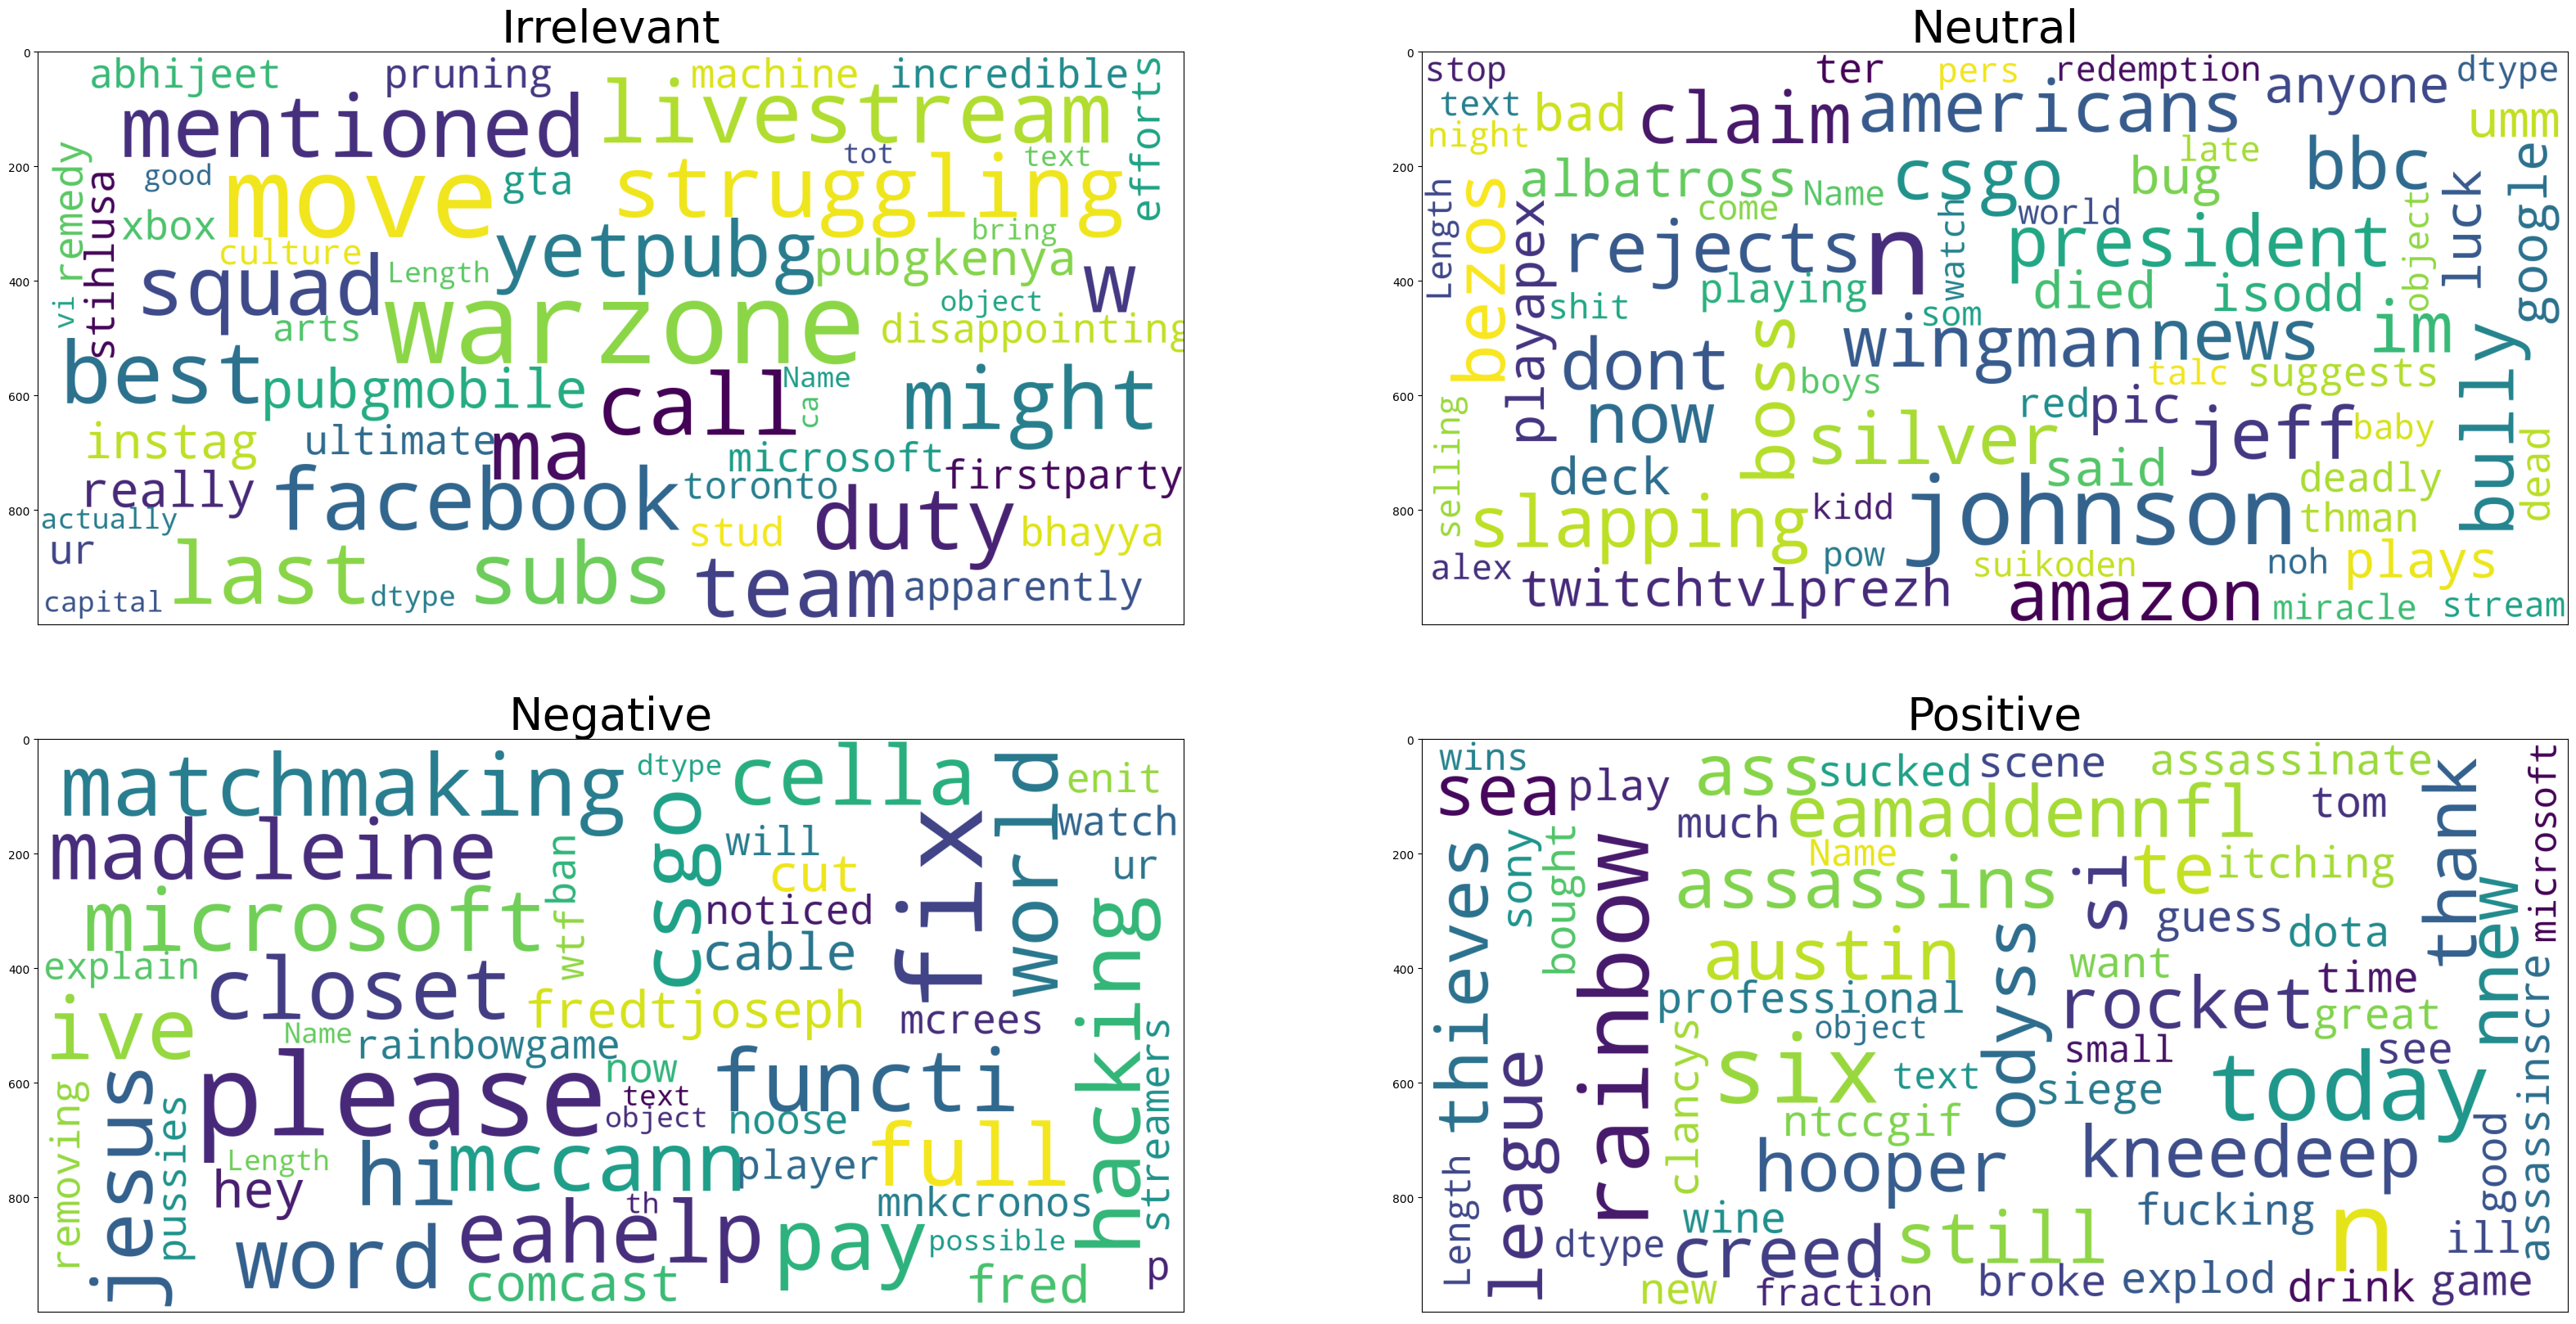

<Figure size 640x480 with 0 Axes>

In [ ]:
#plot 2x2 grid word cloud for each sentiment

plt.figure(figsize=(40,20))

for index, col in enumerate(df['sentiment'].unique()):
    plt.subplot(2,2, index+1)
    #print(col)
    df1=df[df['sentiment']==col]
    data = df1['text']
    wordcloud = WordCloud(background_color ='white', stopwords=stopwords, max_words=500, max_font_size=40, scale=5).generate(str(data))

  	#fig=plt.figure(figsize=(15,15))
    #pit.axis('off')
    #disable ticks
    plt.xticks([])
    plt.yticks()
    plt.imshow(wordcloud)
    plt.title(col, fontsize=40)

plt.show()
plt.tight_layout()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1000 entries, (3364, 'Facebook') to (6960, 'johnson&johnson')
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  1000 non-null   object
 1   text       1000 non-null   object
dtypes: object(2)
memory usage: 60.0+ KB
None

Summary Statistics:
       sentiment  text
count       1000  1000
unique         4   999
top      Neutral   Wow
freq         285     2

Missing values:
sentiment    0
text         0
dtype: int64


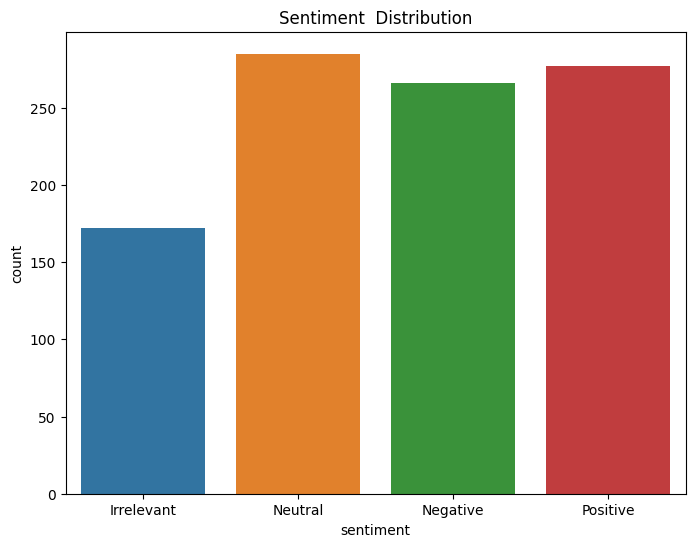

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Load your dataset
df=pd.read_csv('twitter_validation.csv', header=None, names=['sentiment', 'text'])

#Display basic information about the dataset

print("Dataset Information:")
print(df.info())

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())

#check for missing values

print("\nMissing values:")
print(df.isnull().sum())

#Visualize sentiment distribution

plt.figure(figsize =(8,6))
sns.countplot(x='sentiment',data = df)
plt.title('Sentiment  Distribution')
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix

#Load your dataset

df = pd.read_csv('twitter_validation.csv', header=None, names=['sentiment', 'text'])

#Drop rows with missing values
df.dropna(inplace = True)

#Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['sentiment'], test_size=0.2, random_state=42)

#Vectorize the text data
vectorizer=TfidfVectorizer()
x_train_vect=vectorizer.fit_transform(X_train)
x_test_vect = vectorizer.transform(X_test)

#Train a Random ForestClassifier model
clf = RandomForestClassifier()
clf.fit(x_train_vect, y_train)

#Make predictions
y_pred=clf.predict(x_test_vect)

#Generate a confusion matrix
cm=confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 3  9  6 13]
 [ 1 31  3 18]
 [ 2 14 29 16]
 [ 4 11 17 23]]


In [ ]:
# Vectorize the input text
input_text = ['good']
input_text_vect = vectorizer.transform(input_text)
# Make predictions
predicted_sentiment = clf.predict(input_text_vect)
print(predicted_sentiment)

['Positive']


In [ ]:
# Vectorize the input text
input_text = ['you are fool']
input_text_vect = vectorizer.transform(input_text)
# Make predictions
predicted_sentiment = clf.predict(input_text_vect)
print(predicted_sentiment)

['Negative']


In [ ]:
# Vectorize the input text
input_text = ['i will kill you']
input_text_vect = vectorizer.transform(input_text)
# Make predictions
predicted_sentiment = clf.predict(input_text_vect)
print(predicted_sentiment)

['Negative']


In [ ]:
import pickle
pickle.dump(clf, open ('twitter_validation.pkl','wb'))

In [ ]:
%%writefile app.py

#install streamlit: pip install streamlit
# run: streamlit run app.py

import streamlit as st
import pickle
import time
import re
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Define stopwords manually
stopwords = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', 'couldn', 'didn', 'doesn', 'hadn', 'hasn', 'haven', 'isn', 'ma', 'mightn', 'mustn', 'needn', 'shan', 'shouldn', 'wasn', 'weren', 'won', 'wouldn']

# Load the trained model
model = pickle.load(open('twitter_validation.pkl', 'rb'))

# Load training data from CSV
df_train = pd.read_csv('twitter_validation.csv', header=None, names=['sentiment', 'text'])

# Fit the TfidfVectorizer with training data
vectorizer = TfidfVectorizer(stop_words=stopwords)
vectorizer.fit(df_train['text'])

st.title('CYBERBULLYING PREDICTION WITH RANDOM FOREST CLASSIFIER')
tweet = st.text_input('Enter your tweet')
submit = st.button('Predict')

if submit:
    start = time.time()
    # Preprocess the input text
    processed_tweet = tweet.lower()  # Convert to lowercase
    processed_tweet = re.sub(r'http\S+', '', processed_tweet)  # Remove URLs
    processed_tweet = re.sub(r'<.*?>', '', processed_tweet)  # Remove HTML tags
    processed_tweet = re.sub(r'[^a-zA-Z\s]', '', processed_tweet)  # Remove special characters and punctuations
    processed_tweet = re.sub(r'^RT[\s]+', '', processed_tweet)  # Remove retweet tags

    # Vectorize the preprocessed input text using the same vectorizer as during training
    input_text_vect = vectorizer.transform([processed_tweet])

    # Make prediction
    prediction = model.predict(input_text_vect)
    end = time.time()
    st.write('Prediction time taken:', round(end-start, 2), 'seconds')

    st.write(prediction[0])
    if prediction[0] == "Negative":
        st.write('Please do not write bad comments! It comes under CyberBullying')


Writing app.py


In [ ]:
import os

# Get the current working directory
print("Current Directory:", os.getcwd())

# List the contents of the current directory
print("Directory Contents:", os.listdir())

Current Directory: f:\My Drive\Colab Notebooks
Directory Contents: ['Copy of data_preprocessing_tools.ipynb', 'CyberBullying&HateDetectionSystem.ipynb', 'CyberrBullyingModel.ipynb', 'twitter_training.csv', 'twitter_validation.csv', 'twitter_validation.pkl', 'app.py']


In [ ]:
pip install --upgrade streamlit

In [ ]:
!wget -q -O - https://ipv4.icanhazip.com


34.145.179.207


In [ ]:
! streamlit run app.py &npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.145.179.207:8501

npx: installed 22 in 5.035s
your url is: https://nice-hairs-trade.loca.lt
2024-04-21 08:48:55.423 Uncaught app exception
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/streamlit/runtime/scriptrunner/script_runner.py", line 584, in _run_script
    exec(code, module.__dict__)
  File "/content/app.py", line 42, in <module>
    prediction = model.predict(input_text_vect)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 820, in predict
    proba = self.predict_proba(X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 862, in predict_proba
    X = self._validate_X_predict(X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 602, in _validate_X_predict
    X = self._validate_data(X, dtype=DTYPE, accept_sparse="csr", re